In [44]:
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

In [45]:
## Import the dataset from sklearn.datasets
tweets_data = pd.read_csv(R'E:\SEM-2\Data Mining Applications\twitterMining.csv')
print(tweets_data.shape)
tweets_data.head()

(1000, 12)


,Unnamed: 0,user,location,Tweets,Subjectivity,Polarity,Positive,Negative,Neutral,compound,TextBlobAnalysis,VADERAnalysis
0,0,__E_H__,NaN,I switched to my dirty reddit account to look ...,0.800000,-0.6,0.099,0.229,0.672,-0.5106,Negative,Negative
1,1,kirathecoolest,NaN,i wonder if i have corona or just a really bad...,0.666667,-0.7,0.000,0.322,0.678,-0.5849,Negative,Negative
2,2,spunkeryy,"Guadalajara, Jalisco",Hopefully you do get the Corona virus,0.000000,0.0,0.310,0.000,0.690,0.4019,Neutral,Positive
3,3,HuseinTunde,NaN,Stopping people from gathering under this cir...,0.000000,0.0,0.000,0.110,0.890,-0.1531,Neutral,Negative
4,4,NkyEzenwa,Nigeria,165 Ok dear after Corona season,0.500000,0.5,0.545,0.000,0.455,0.5859,Positive,Positive


In [46]:
tweets_type_counts = tweets_data[['Tweets', 'VADERAnalysis']].groupby('VADERAnalysis').count()
print(tweets_type_counts)

               Tweets
VADERAnalysis        
Negative          327
Neutral           352
Positive          321


In [47]:
labels = np.array(tweets_data['VADERAnalysis'])

In [48]:
Features = np.array(tweets_data[[ 'compound', 'Positive','Negative','Neutral']])

levels = {'Negative':0, 'Neutral':1, 'Positive':2}
Labels =  np.array([levels[x] for x in tweets_data['VADERAnalysis']])

In [49]:
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [50]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [51]:
nr.seed(1115)
svm_mod = svm.LinearSVC()
svm_mod.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [52]:
X_test = scale.transform(X_test)
scores = svm_mod.predict(X_test)

In [53]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Negative   Score Neutral    Score Positive')
    print('Actual Negative      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Neutral       %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Positive      %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Negative  Neutral  Positive')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)  

                 Confusion matrix
                 Score Negative   Score Neutral    Score Positive
Actual Negative          99                0                 0
Actual Neutral            2               98                 5
Actual Positive           0                0                96

Accuracy        0.98
 
          Negative  Neutral  Positive
Num case   99.00     105.00      96.00
Precision   0.98      1.00       0.95
Recall      1.00      0.93       1.00
F1          0.99      0.97       0.97


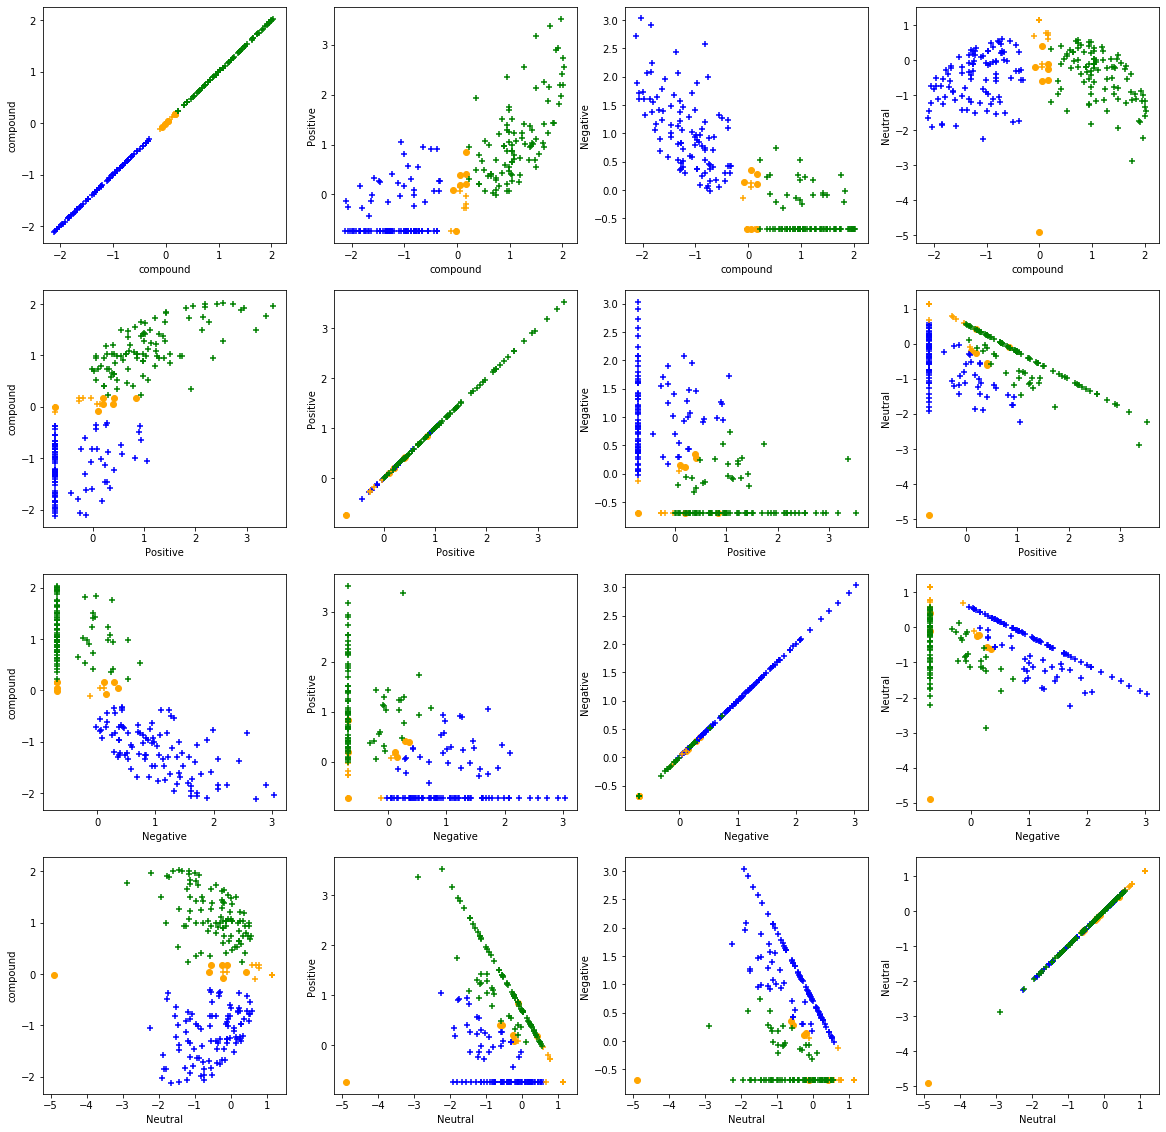

In [43]:
def plot_iris_score(tweets_data, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    tweetsdata = pd.DataFrame(tweets_data)
    levels = {0:'Negative', 1:'Neutral', 2:'Positive'}
    tweetsdata['TextBlobAnalysis'] = [levels[x] for x in y_test]
    tweetsdata.columns = [ 'compound', 'Positive','Negative','Neutral','TextBlobAnalysis']
    
    ## Set up for the plot
    fig, ax = plt.subplots(4, 4, figsize=(20,20))
    markers = ['o', '+']
    x_ax = ['compound', 'Positive','Negative','Neutral']
    y_ax = [ 'compound','Positive','Negative','Neutral']
    
    for t in range(2): # loop over correct and incorect classifications
        negative = tweetsdata[(tweetsdata['TextBlobAnalysis'] == 'Negative') & (true == t)]
        neutral = tweetsdata[(tweetsdata['TextBlobAnalysis'] == 'Neutral') & (true == t)]
        positive = tweetsdata[(tweetsdata['TextBlobAnalysis'] == 'Positive') & (true == t)]
        # loop over all the dimensions
        for i in range(4):
            for j in range(4):
                ax[i,j].scatter(negative[x_ax[i]], negative[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(neutral[x_ax[i]], neutral[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(positive[x_ax[i]], positive[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

                 Confusion matrix
                 Score Negative   Score Neutral    Score Positive
Actual Negative          99                0                 0
Actual Neutral            2               98                 5
Actual Positive           0                0                96

Accuracy        0.98
 
          Negative  Neutral  Positive
Num case   99.00     105.00      96.00
Precision   0.98      1.00       0.95
Recall      1.00      0.93       1.00
F1          0.99      0.97       0.97


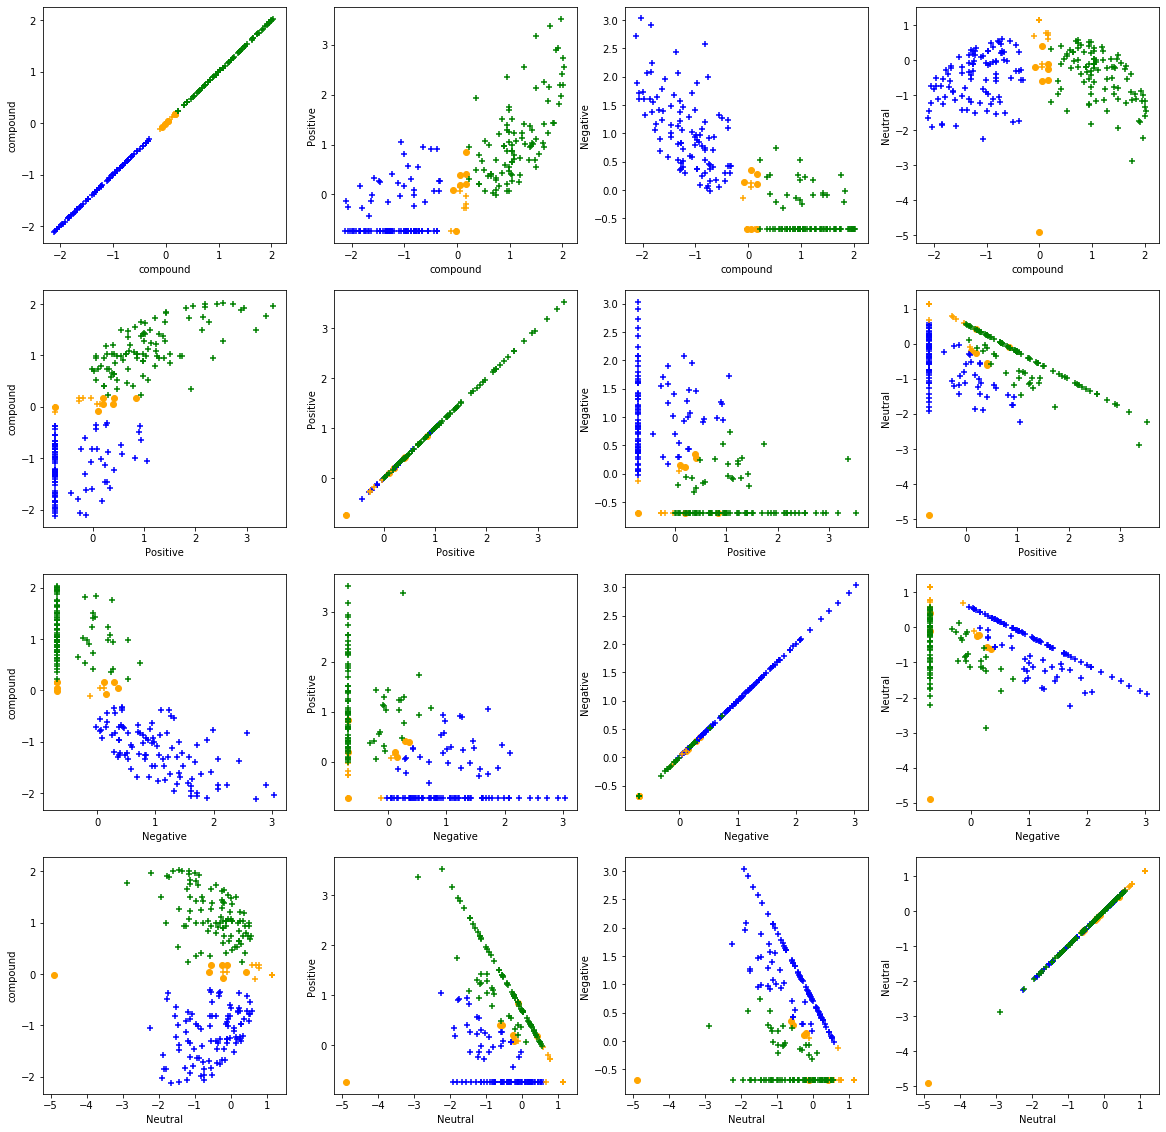

In [54]:
nr.seed(1115)
svc_mod = svm.SVC()
svc_mod.fit(X_train, y_train)
scores = svm_mod.predict(X_test)
print_metrics_3(y_test, scores) 
plot_iris_score(X_test, y_test, scores)